# EE5175 Lab 7 : DFT, Magnitude-Phase Dominance
### Author : Niyas Mon P
### Roll No: EE20B094


In [159]:
#  Before running the code blocks, please ensure all the images are uploaded

In [160]:
# importing necessary libraries
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import cv2

In [161]:
# reading the images
I1 = cv2.imread('fourier.png')
I2 = cv2.imread('fourier_transform.png')

In [162]:
I1.shape

(340, 280, 3)

In [163]:
# convert image from 3 channel to 1 channel image. cause, it is in gray scale
I1 = I1[:,:,0]
I2 = I2[:,:,0]

## **2D DFT**

2D DFT is computed using row-column decomposition as follows
$$
F(k,l) = \frac{1}{\sqrt{M \cdot N}}\Sigma_{m=0}^{m=M-1}\Sigma_{n=0}^{n=N-1}f(m,n)⋅e^\frac{-j2πmk}{M}e^\frac{-j2πnl}{N}
\\
F(k,l) = \frac{1}{\sqrt{M \cdot N}}\Sigma_{m=0}^{m=M-1}e^\frac{-j2πmk}{M}\Sigma_{n=0}^{n=N-1}f(m,n)⋅e^\frac{-j2πnl}{N}
\\
F(k,l) = \frac{1}{\sqrt{M \cdot N}}f_{i}(m,l)\Sigma_{m=0}^{m=M-1}e^\frac{-j2πmk}{M}
$$
where $f_{i}(m,l)$ is the 1D DFT of the rows

In [164]:
#  finction to perform 2d DFT using row-column decomposition.
def DFT2d(img):
  # getting shape of the image
  n,m = img.shape
  # calculating dft of raws
  dft_rows = np.fft.fft(img, axis=1)
  # calculating dft of columns
  dft_rows_cols = np.fft.fft(dft_rows, axis=0)
  # shifting the transform such that centre represents lower frequency for better pictorising
  out = np.fft.fftshift(dft_rows_cols)
  # making it unitary form
  out = out / np.sqrt(m * n)
  # magnitude
  mag = np.abs(out)
  # phase
  phase = np.angle(out)

  return mag, phase

## **Inverse DFT**

In [165]:
# inverse DFT function
def IDFT2d(mag, phase):
  # shape of the image
  m,n = mag.shape
  # Reconstruct the complex DFT coefficients
  mag = mag * np.sqrt(m*n)
  complex_coeffs = mag * np.exp(1j * phase)

  # Apply the inverse DFT
  reconstructed_image = np.fft.ifft2(np.fft.ifftshift(complex_coeffs)).real

  return reconstructed_image

## **Magnitude and phase plots**

In [166]:
# obtaing DFT tranform of I1:'forier.png' and I2:'fourier_transform.png'
mag1,phase1 = DFT2d(I1)
mag2,phase2 = DFT2d(I2)

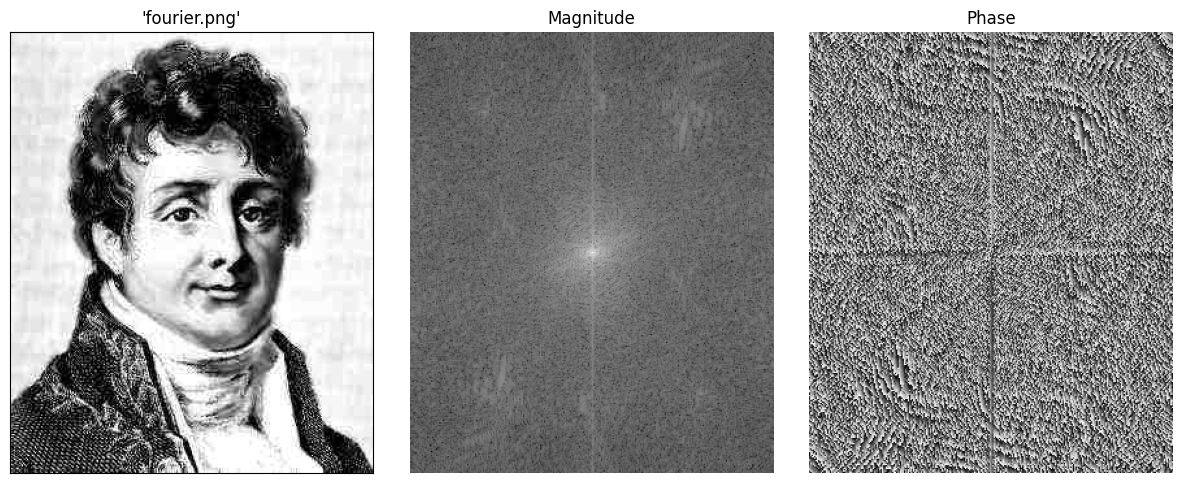

In [167]:
# plotting the 2 images and their DFT magnitudes and phase
# magnitude is ploted in log scale

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6))

# Plot image
ax1.imshow(I1, cmap='gray')
ax1.set_title('\'fourier.png\'')
ax1.set_xticks([])
ax1.set_yticks([])

# Plot magnitude
ax2.imshow(np.log10(mag1), cmap='gray')
ax2.set_title('Magnitude')
ax2.axis('off')

# Plot phase
ax3.imshow(phase1, cmap='gray')
ax3.set_title('Phase')
ax3.axis('off')

plt.subplots_adjust(wspace=0.1)
plt.show()

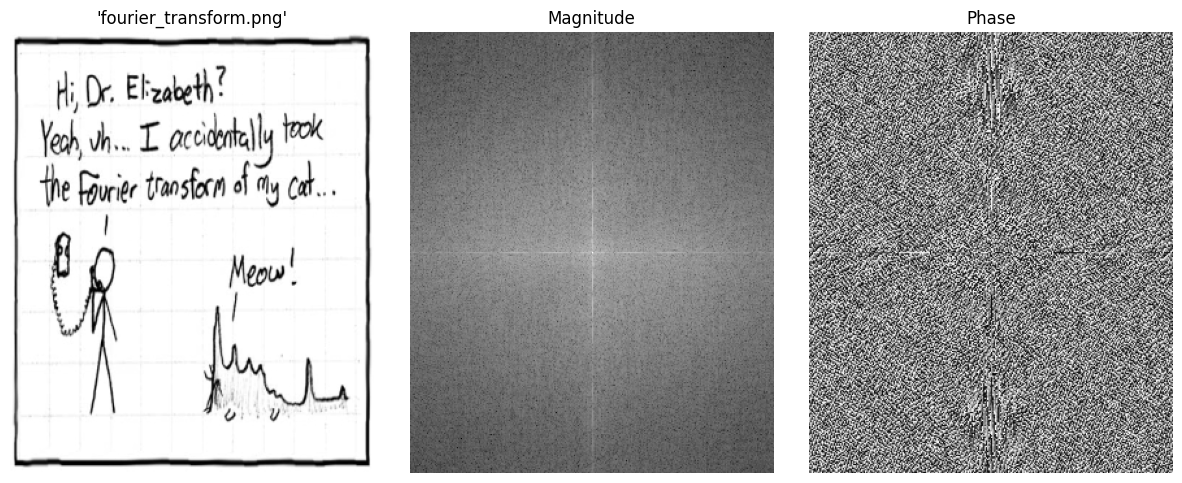

In [168]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6))

# Plot image
ax1.imshow(I2, cmap='gray')
ax1.set_title('\'fourier_transform.png\'')
ax1.axis('off')

# Plot magnitude
ax2.imshow(np.log10(mag2), cmap='gray')
ax2.set_title('Magnitude')
ax2.axis('off')

# Plot magnitude
ax3.imshow(phase2, cmap='gray')
ax3.set_title('Phase')
ax3.axis('off')

plt.subplots_adjust(wspace=0.1)
plt.show()

## Reconstruction of original images from magnitude and phase

<ipython-input-169-b4bb7d5c0232>:19: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.05)


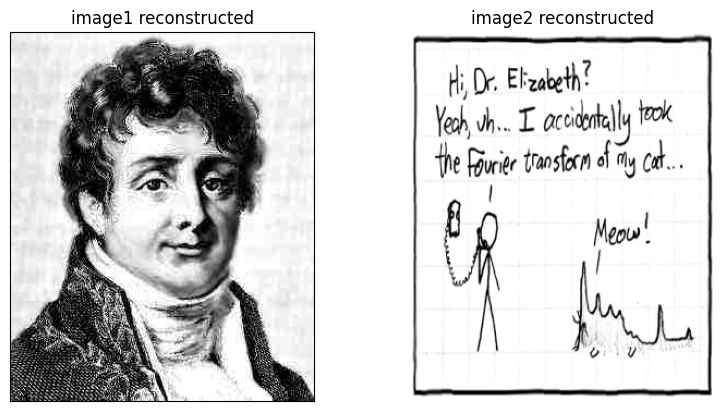

In [169]:
# Reconstructing the same images inorder to verify inverse-DFT functionality
I1_reconstructed = IDFT2d(mag1,phase1)
I2_reconstructed = IDFT2d(mag2,phase2)

# plotting the reconstructed images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

# Plot of image 1
ax1.imshow(I1_reconstructed, cmap='gray')
ax1.set_title('image1 reconstructed')
ax1.set_xticks([])
ax1.set_yticks([])

# Plot of image 2
ax2.imshow(I2_reconstructed, cmap='gray')
ax2.set_title('image2 reconstructed')
ax2.axis('off')

plt.subplots_adjust(wspace=0.05)
plt.show()

## **Illustration of phase dominance**
### Creating of new images $I_{3}$ and $I_{4}$ such that their DFTs are, respectively,
$$
F_3 (k,l) = |F_1 (k,l)|e^{jφ_2(k,l)}\\
F_4 (k,l) = |F_2 (k,l)|e^{jφ_1(k,l)}
$$

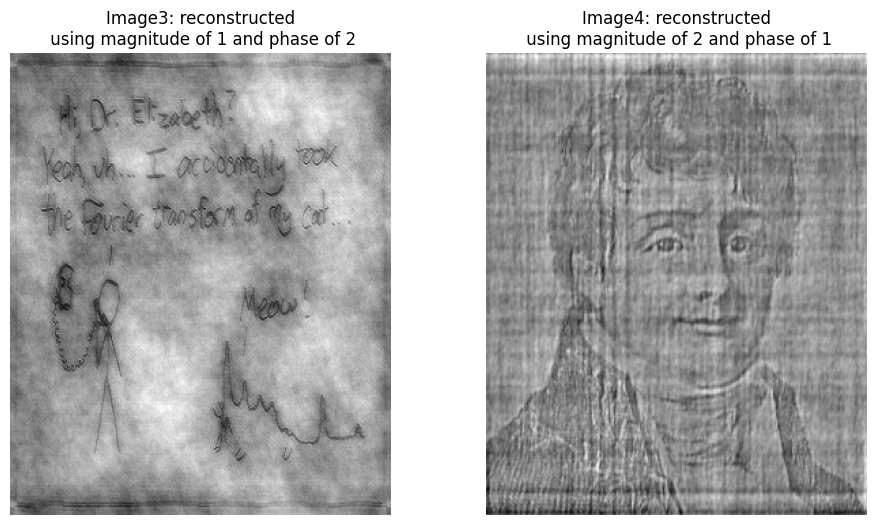

In [170]:
I3_reconstructed = IDFT2d(mag1,phase2)
I4_reconstructed = IDFT2d(mag2,phase1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot magnitude
ax1.imshow(I3_reconstructed, cmap='gray')
ax1.set_title('Image3: reconstructed\n using magnitude of 1 and phase of 2')
ax1.axis('off')
# Plot phase
ax2.imshow(I4_reconstructed, cmap='gray')
ax2.set_title('Image4: reconstructed\n using magnitude of 2 and phase of 1')
ax2.axis('off')


plt.subplots_adjust(wspace=0.05)
plt.show()

## Inferences

* The 2D DFT is computed as row-column decomposition. 1D DFT is computed using fft. Totally we have $2N$ such fft computations each having complexity of $O(Nlog(N))$. Hence the total complexity of this 2D DFT implementation is $O(N^2log(N))$
* **Phase dominance** is seen when we swap the phases of the 2 images to create new images and the reconstructed image looks closer to the parent image of the phase used.
* When we examine the magnitude plots, most of the energy is concentrated around the centre(lower frequencies)